<a href="https://colab.research.google.com/github/AhmedElawady74/7-project-for-ML/blob/main/7_project_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install feature-engine
!pip install category_encoders
!apt-get install -y graphviz
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
# Все библиотеки необходимые для заданий
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import plot_tree

In [ ]:
# Чтение файла данных
file_path = '/content/cars_moldova.csv'
df = pd.read_csv(file_path)

In [ ]:
# Отобразить первые 5 строк файла
print(df.head())

         Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0      Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1     Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Volkswagen          Golf  1998  Hatchback       1.0                1400.0   
3     Renault        Laguna  2012  Universal  110000.0                1500.0   
4        Opel         Astra  2006  Universal  200000.0                1600.0   

      Fuel_type Transmission  Price(euro)  
0        Hybrid    Automatic       7750.0  
1        Diesel       Manual       8550.0  
2        Petrol       Manual       2200.0  
3        Diesel       Manual       6550.0  
4  Metan/Propan       Manual       4100.0  


In [ ]:
# Информация о данных, такая как количество строк и столбцов, а также типы данных.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 41007 non-null  object 
 2   Year                  41007 non-null  int64  
 3   Style                 41007 non-null  object 
 4   Distance              41007 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          41007 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.8+ MB
None


In [ ]:
# Статистика и сводки числовых значений в данных
print(df.describe())

               Year      Distance  Engine_capacity(cm3)   Price(euro)
count  41007.000000  4.100700e+04          41007.000000  4.100700e+04
mean    2007.976175  4.567353e+05           1853.856732  9.727109e+03
std        8.241487  4.451897e+06            700.364532  5.043926e+04
min     1900.000000  0.000000e+00              0.000000  1.000000e+00
25%     2004.000000  8.750000e+04           1500.000000  3.500000e+03
50%     2009.000000  1.680000e+05           1800.000000  6.600000e+03
75%     2014.000000  2.300000e+05           2000.000000  1.215000e+04
max     2021.000000  1.000000e+08           9999.000000  1.000000e+07


In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)',
       'Fuel_type', 'Transmission', 'Price(euro)'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Initial Data Preparation

# Define features and target
features = ['Year', 'Distance', 'Engine_capacity(cm3)']  # Add other features if desired
target = 'Price(euro)'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (32805, 3)
Shape of X_test: (8202, 3)
Shape of y_train: (32805,)
Shape of y_test: (8202,)


Цель этого кода — подготовить данные для обучения и оценки моделей машинного обучения. Это гарантирует, что у нас есть отдельные наборы для обучения и тестирования, что имеет решающее значение для оценки эффективности обобщения модели. Напечатанные фигуры дают представление о размере наборов данных для обучения и тестирования.

In [ ]:
# Setting up Model Pipelines

# Define numeric and categorical features
numeric_features = ['Year', 'Distance', 'Engine_capacity(cm3)']
categorical_features = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']  # Add other categorical features if desired

# Build the numeric processor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Build the categorical processor
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine processors in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Build the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Set up the model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', model)])

Когда мы запустите этот код:

1- Числовая обработка: он устанавливает конвейер для числовых функций, включая вменение пропущенных значений с использованием медианы и масштабирование функций с помощью StandardScaler.

2- Категориальная обработка: он устанавливает конвейер для категориальных функций, включая вменение пропущенных значений постоянным значением («отсутствует») и применение горячего кодирования с помощью OneHotEncoder.

3- ColumnTransformer: объединяет числовые и категориальные процессоры в один ColumnTransformer.

4- Модель случайного леса: создается модель регрессора случайного леса со 100 оценщиками и случайным начальным числом 42.

5- Настройка конвейера: он создает конвейер, который сначала применяет этапы предварительной обработки, а затем соответствует модели.

> Этот конвейер полезен для обработки различных типов функций и эффективного построения прогнозной модели. Он инкапсулирует все необходимые шаги, что упрощает обучение и оценку модели.

In [ ]:
# Training the Baseline Model

# Define the target feature
target = 'Price(euro)'

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the baseline model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Distance',
                                                   'Engine_capacity(cm3)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Model', 'Style',
                                                   'Fuel_type',
                                                   'Transmission'])])),
                ('model', RandomForestRegressor(random_state=42))])

Когда мы запускаем этот код:

1- Определение цели: устанавливает целевую функцию «Цена (евро)».

2- Разделение данных: он использует train_test_split из scikit-learn для разделения данных на наборы обучения и тестирования. Тестовый набор составляет 20% от общего объема данных, а для воспроизводимости для случайного начального числа установлено значение 42.

3- Обучение модели: обучение базовой модели с использованием определенного конвейера (pipeline.fit). Конвейер включает этапы предварительной обработки и модель случайного лесного регрессора. Обучение выполняется на обучающих данных (X_train и y_train).

> Этот код является важным шагом в рабочем процессе машинного обучения. Он подготавливает данные для обучения, разбивает их на обучающий и тестовый наборы, а затем обучает базовую модель на обучающих данных. Обученную модель можно оценить на тестовом наборе на последующих этапах.

In [ ]:
# Выбирать 10% данных в качестве образца
df_sample = df.sample(frac=0.1, random_state=42)

Мы использовали только 10% данных или уменьшили размер данных, поскольку каждый раз, когда код запускается с полными данными, мне выдается, что вся оперативная память использована, поэтому я прибегнул к сокращению данных.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training RMSE Decision Tree: 458.0135969717924
Testing RMSE Decision Tree: 6195.472512017576


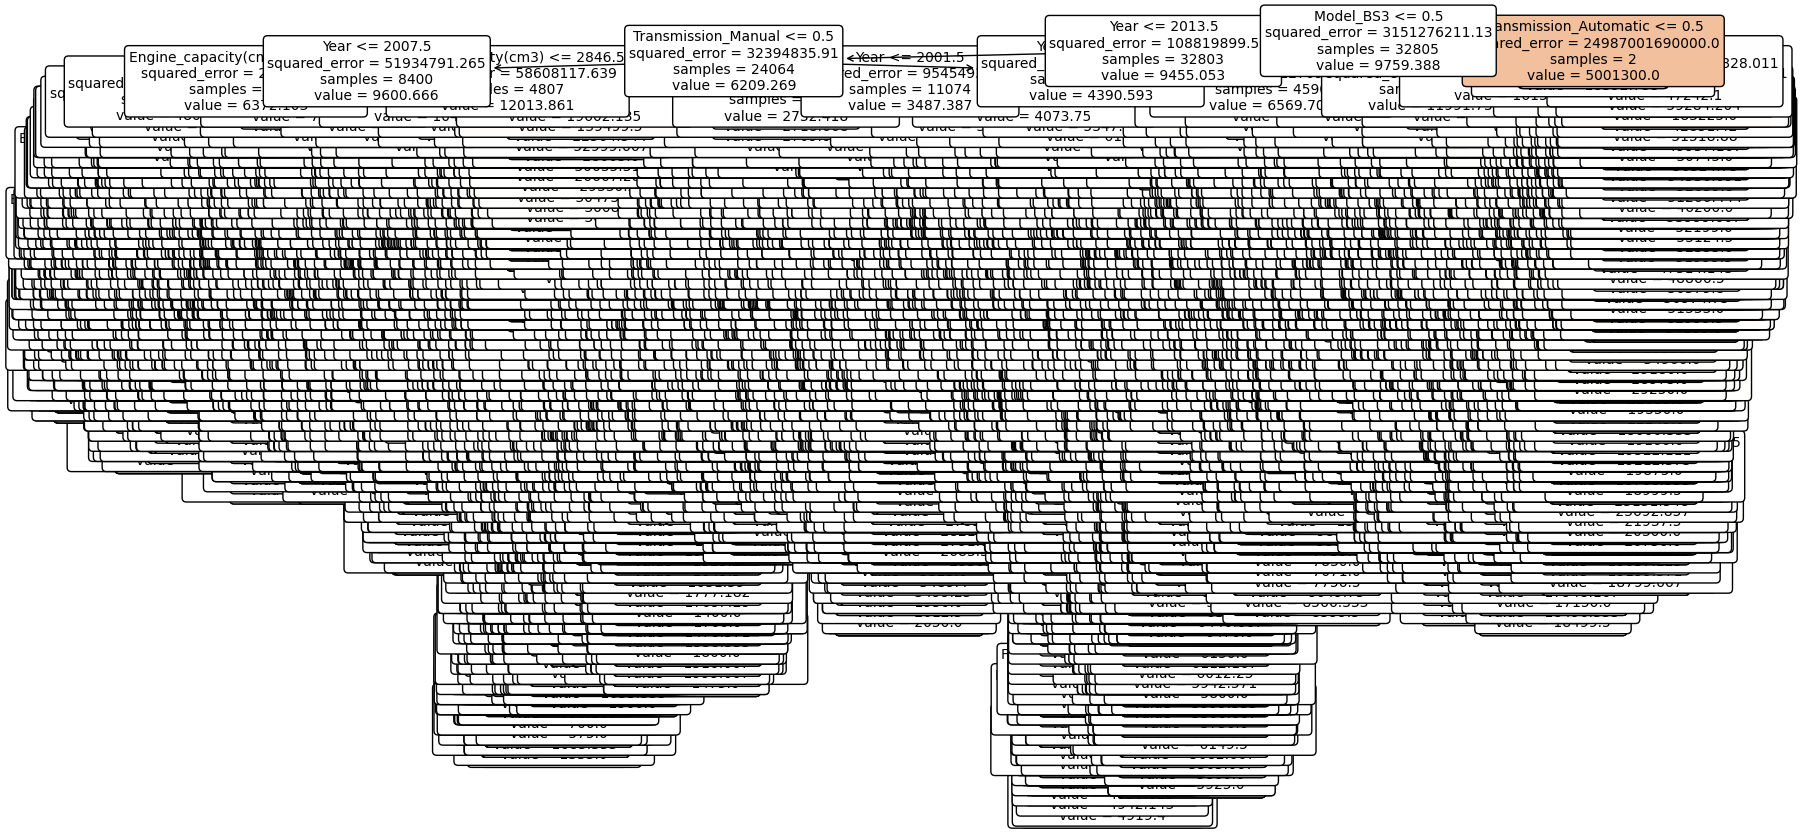

In [ ]:
# Define features and target
X = df.drop("Price(euro)", axis=1)
y = df["Price(euro)"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text variables using One-Hot Encoding
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', DecisionTreeRegressor(random_state=42))])

# Training
model_decision_tree.fit(X_train, y_train)

# Prediction using validation data
y_pred_train_dt = model_decision_tree.predict(X_train)
y_pred_test_dt = model_decision_tree.predict(X_test)

# Calculate performance metric
train_rmse_dt = mean_squared_error(y_train, y_pred_train_dt, squared=False)
test_rmse_dt = mean_squared_error(y_test, y_pred_test_dt, squared=False)

print(f'Training RMSE Decision Tree: {train_rmse_dt}')
print(f'Testing RMSE Decision Tree: {test_rmse_dt}')

# Plot the decision tree and save it as an image file
plt.figure(figsize=(20, 10))
plot_tree(model_decision_tree['regressor'], feature_names=numeric_features.tolist() + model_decision_tree['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist(), filled=True, rounded=True, fontsize=10)
plt.savefig("/content/decision_tree_plot.png", format="png")
plt.show()

Наблюдения и пояснения:

1- Подготовка данных: код сначала подготавливает данные, определяя функции (X) и целевую переменную (y). Затем данные разбиваются на наборы для обучения и тестирования: 80 % для обучения и 20 % для тестирования.

2- Преобразование функций: код использует One-Hot Encoding для преобразования категориальных переменных в формат, подходящий для моделей машинного обучения. Он обрабатывает пропущенные значения, вменяя среднее значение для числовых признаков и наиболее частое значение для категориальных признаков.

3- Обучение модели регрессии дерева решений: создается конвейер, который включает в себя преобразование признаков (препроцессор) и регрессор дерева решений (регрессор). Модель обучается на обучающих данных.

4- Оценка модели. Затем код использует обученную модель для прогнозирования как обучающего (y_pred_train_dt), так и тестового (y_pred_test_dt) наборов. Он вычисляет среднеквадратичную ошибку (RMSE) как показатель производительности для обоих наборов.

5- Построение дерева решений. Дерево решений визуализируется с помощью функцииplot_tree из scikit-learn. Полученная древовидная диаграмма сохраняется в виде файла изображения (decision_tree_plot.png) и отображается.

График дерева решений:

- Каждый узел в дереве представляет решение, основанное на признаке.
- Дерево разбивается в зависимости от условий в каждом узле.
- Цвет узлов указывает прогнозируемое значение целевой переменной.
- Древовидная структура представляет процесс принятия решений модели.

>Эта визуализация помогает понять, как Дерево решений делает прогнозы и важность различных функций в процессе принятия решений. Это может быть полезно для интерпретируемости и объяснения моделей.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Create the grid search pipeline
grid_search = GridSearchCV(model_decision_tree, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model
best_model = grid_search.best_estimator_

# Prediction using validation data
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

# Calculate performance metric
train_rmse_best = mean_squared_error(y_train, y_pred_train_best, squared=False)
test_rmse_best = mean_squared_error(y_test, y_pred_test_best, squared=False)

print(f'Training RMSE with Best Model: {train_rmse_best}')
print(f'Testing RMSE with Best Model: {test_rmse_best}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Hyperparameters: {'preprocessor__num__imputer__strategy': 'mean', 'regressor__max_depth': 20, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10}
Training RMSE with Best Model: 39239.91675033554
Testing RMSE with Best Model: 5948.284143969544


Наблюдения и пояснения:

1- Поиск по сетке для настройки гиперпараметров: код выполняет поиск по сетке, чтобы найти лучшие гиперпараметры для модели дерева решений. Он определяет сетку значений гиперпараметров для стратегии вменения, максимальной глубины, минимального разделения выборок и минимального листа выборок.

2- Конвейер поиска по сетке: поиск по сетке осуществляется с помощью GridSearchCV, который использует модель (model_decision_tree), сетку гиперпараметров (param_grid), перекрестную проверку (cv=5 для 5-кратной перекрестной проверки), показатель оценки (scoring=' neg_mean_squared_error' для регрессии) и количество параллельных заданий (n_jobs=-1 для использования всех доступных процессоров).

3- Лучшие гиперпараметры и модель: после поиска по сетке распечатываются лучшие гиперпараметры и извлекается лучшая модель на основе заданной оценочной метрики.

4- Оценка модели с лучшими гиперпараметрами: используется лучшая модель для прогнозирования как на обучающем, так и на тестовом наборах. Затем он вычисляет среднеквадратическую ошибку (RMSE) для обоих наборов, используя прогнозы.

> Выход:

- Выходные данные включают лучшие гиперпараметры, найденные во время поиска по сетке.
- Значения RMSE печатаются как для обучающего, так и для тестового наборов с использованием модели с лучшими гиперпараметрами.

> Польза кода для задачи:

- Поиск по сетке помогает найти оптимальные гиперпараметры для модели дерева решений, повышая ее производительность.
- Настраивая гиперпараметры, модель с большей вероятностью будет хорошо обобщаться на новые, невидимые данные.
- Выходные данные дают представление о конфигурации, что приводит к повышению производительности прогнозирования.

Decision Tree (Train) RMSE: 458.0135969717924
Decision Tree (Test) RMSE: 6195.472512017576
Best Decision Tree (Train) RMSE: 39239.91675033554
Best Decision Tree (Test) RMSE: 5948.284143969544


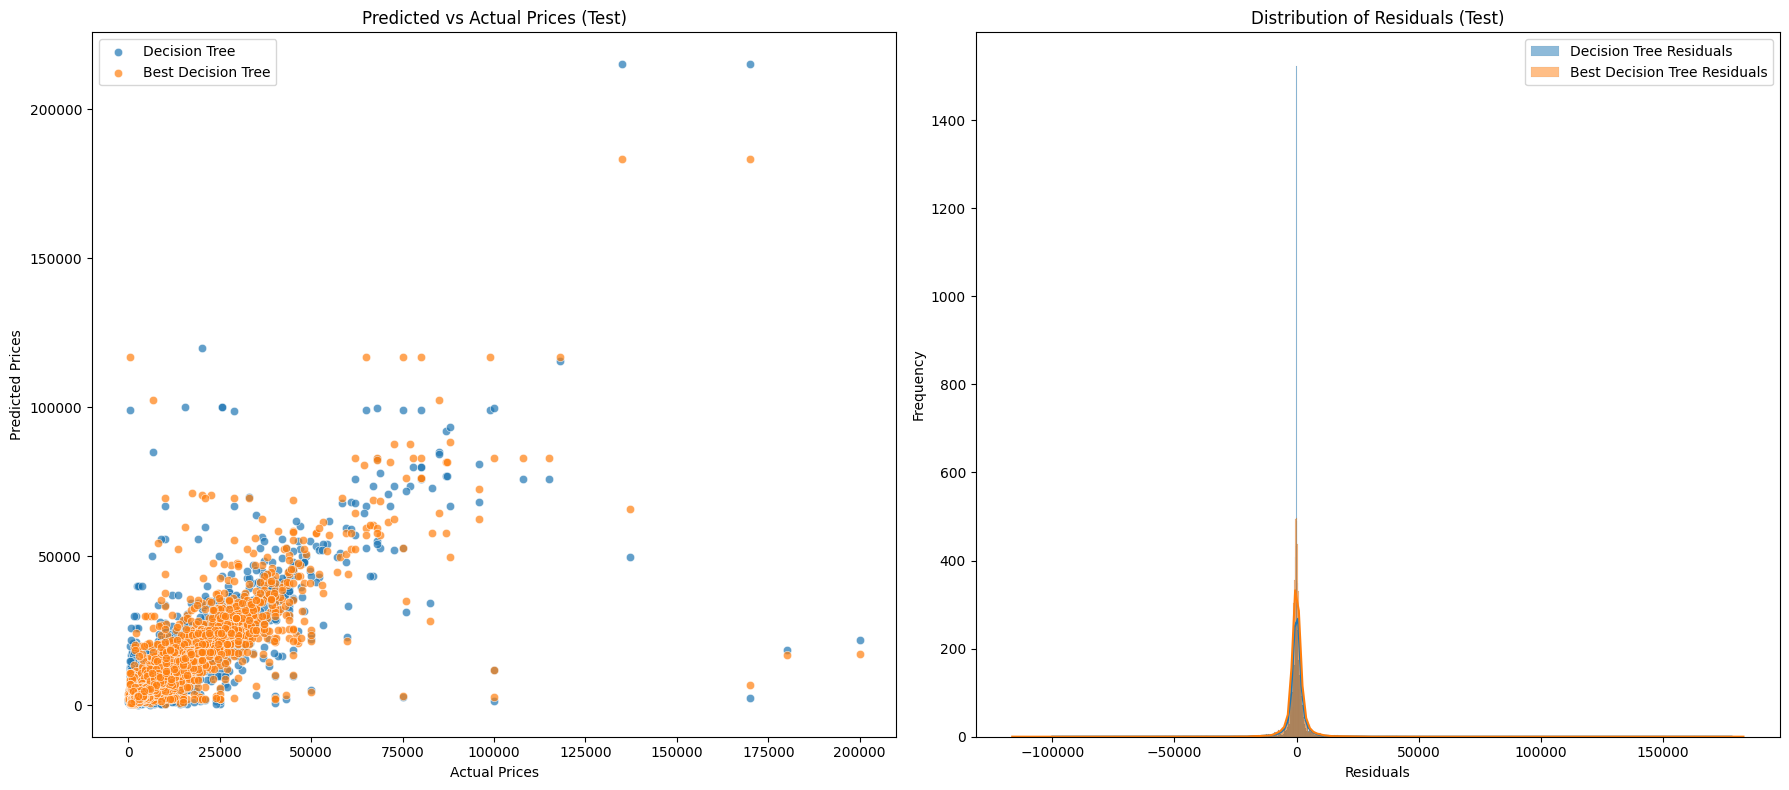

In [ ]:
import seaborn as sns

# Model Performance Evaluation
def evaluate_model(y_true, y_pred, model_name=''):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f'{model_name} RMSE: {rmse}')
    return rmse

# Evaluate the original model
train_rmse_dt = evaluate_model(y_train, y_pred_train_dt, 'Decision Tree (Train)')
test_rmse_dt = evaluate_model(y_test, y_pred_test_dt, 'Decision Tree (Test)')

# Evaluate the optimized model
train_rmse_best = evaluate_model(y_train, y_pred_train_best, 'Best Decision Tree (Train)')
test_rmse_best = evaluate_model(y_test, y_pred_test_best, 'Best Decision Tree (Test)')

# Plot scatterplots of predictions against actual values
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test_dt, label='Decision Tree', alpha=0.7)
sns.scatterplot(x=y_test, y=y_pred_test_best, label='Best Decision Tree', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices (Test)')
plt.legend()

# Plot histograms of residuals
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_test_dt, label='Decision Tree Residuals', kde=True)
sns.histplot(y_test - y_pred_test_best, label='Best Decision Tree Residuals', kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Test)')
plt.legend()

plt.tight_layout()
plt.show()

1- Оценка модели:

- В коде определяется функция Assessment_model для расчета и печати RMSE (среднеквадратичной ошибки) для прогнозов данной модели по сравнению с истинными значениями.
- Затем он оценивает RMSE как для исходной модели дерева решений, так и для оптимизированной модели дерева решений как на обучающем, так и на тестовом наборах.

2- Диаграммы рассеяния:

- Код строит диаграммы рассеяния, сравнивающие фактические цены (y_test) с прогнозируемыми ценами как для исходного дерева решений, так и для оптимизированного дерева решений в тестовом наборе.
- Это обеспечивает визуальное представление того, насколько хорошо прогнозы моделей совпадают с фактическими значениями.

3- Распределение остатков:

- Код строит гистограммы остатков (разниц между фактическими и прогнозируемыми ценами) как для исходного дерева решений, так и для оптимизированного дерева решений на тестовом наборе.
- Эта визуализация помогает понять распределение ошибок и выявить отклонения или неточности моделей в определенных ценовых диапазонах.

4- Польза кода для задачи:

- Код обеспечивает комплексную оценку производительности модели, включая как исходные, так и оптимизированные модели.
- Диаграммы рассеяния и распределения остатков дают представление о том, насколько хорошо модели делают прогнозы и где они могут не соответствовать действительности.
- Этот визуальный анализ помогает понять сильные и слабые стороны моделей и, при необходимости, дает рекомендации по дальнейшим улучшениям.

Decision Tree Rules:
 |--- Model_BS3 <= 0.50
|   |--- Year <= 2013.50
|   |   |--- Transmission_Manual <= 0.50
|   |   |   |--- Year <= 2007.50
|   |   |   |   |--- Engine_capacity(cm3) <= 2358.00
|   |   |   |   |   |--- Year <= 2003.50
|   |   |   |   |   |   |--- Model_Twingo <= 0.50
|   |   |   |   |   |   |   |--- Year <= 2001.50
|   |   |   |   |   |   |   |   |--- Make_ARO <= 0.50
|   |   |   |   |   |   |   |   |   |--- Style_Crossover <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Make_Mercedes <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 25
|   |   |   |   |   |   |   |   |   |   |--- Make_Mercedes >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |--- Style_Crossover >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Distance <= 86500.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- D

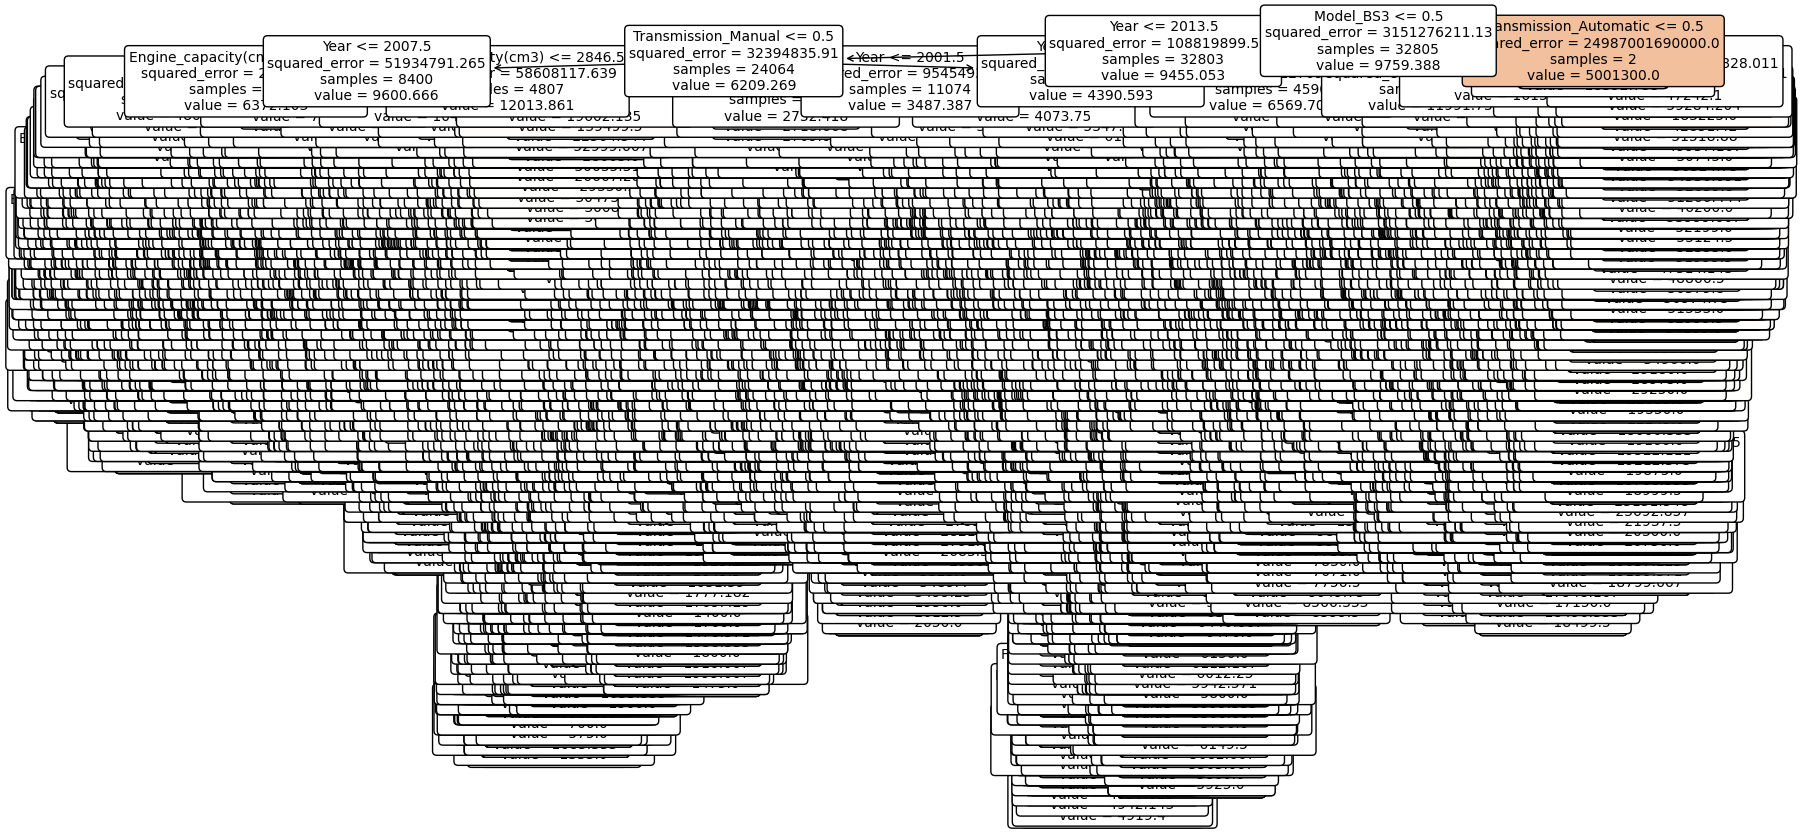

In [ ]:
from sklearn.tree import export_text
from sklearn import tree

# Extract feature names from the preprocessor
feature_names = numeric_features.tolist() + model_decision_tree['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist()

# Extract decision tree from the pipeline
decision_tree = model_decision_tree['regressor']

# Display the decision tree rules
tree_rules = export_text(decision_tree, feature_names=feature_names)
print("Decision Tree Rules:\n", tree_rules)

# Plot the decision tree and save it as an image file
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.savefig("/content/decision_tree_plot.png", format="png")
plt.show()

Объяснение:

1- Извлечение названий функций:
- Код извлекает имена функций из препроцессора, объединяя числовые и категориальные имена функций, закодированные одним горячим способом. Этот шаг необходим для понимания и визуализации дерева решений.

2- Извлечение дерева решений:
- Дерево решений извлекается из конвейера обученной модели. Это дерево, которое модель изучила во время обучения.

3- Отображение правил дерева решений:
- Функция Export_text используется для отображения правил дерева решений в текстовом формате. Эти правила дают представление о том, как модель делает прогнозы на основе различных функций.

4- Построение дерева решений:
- Функцияplot_tree используется для графической визуализации дерева решений. Этот график показывает структуру дерева, включая узлы решений и конечные узлы. Также отображаются функции, используемые для принятия решений, и пороговые значения.

> Наблюдения:

- Текстовые правила обеспечивают четкое понимание условий, при которых дерево решений делает прогнозы.
- Графическое представление (график) визуально показывает структуру дерева решений, что упрощает интерпретацию и передачу процесса принятия решений.

>Эта визуализация ценна с точки зрения интерпретируемости, особенно при работе с моделями дерева решений, поскольку позволяет увидеть логику и условия, которые модель извлекла из данных.